In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio
import scipy as sp
from scipy.io import wavfile
from scipy import signal
%matplotlib inline

In [8]:
def rms(emg, window_width):
    half_width = int(window_width/2)
    emg_rms = [emg[max(0,i-half_width): min(len(emg)-1, i+half_width)] for i in range(len(emg))]
    return np.asarray([np.sqrt(np.mean(np.square(window))) for window in emg_rms])

In [2]:
def plot_signal(signal, rate=1000, ax=None):# plot EMG signal
    if ax is None:
        fig, ax = plt.subplots(figsize=(11,7))
    time = np.array([i/rate for i in range(len(signal))])
    ax.plot(time, signal)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Signal')

In [3]:
# simulate EMG signal
burst1 = np.random.uniform(-1, 1, size=1000) + 0.08
burst2 = np.random.uniform(-1, 1, size=1000) + 0.08
quiet = np.random.uniform(-0.05, 0.05, size=500) + 0.08
emg = np.concatenate([quiet, burst1, quiet, burst2, quiet])
time = np.array([i/1000 for i in range(0, len(emg), 1)]) # sampling rate 1000 Hz

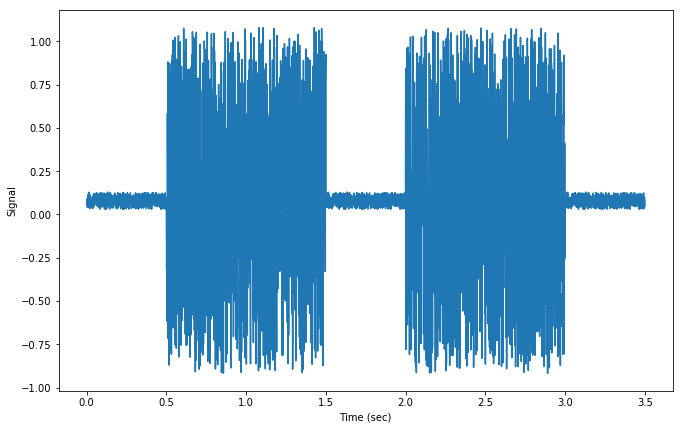

In [4]:
plot_signal(emg, 1000)

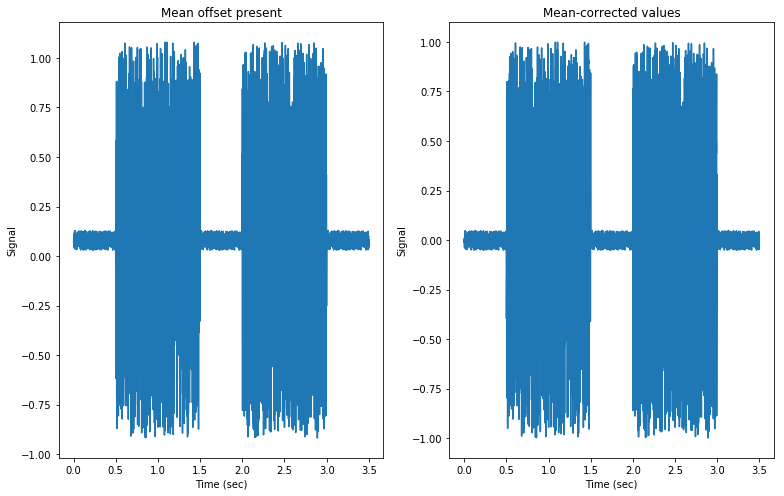

In [5]:
emg_correctmean = emg - np.mean(emg)

# plot comparison of EMG with offset vs mean-corrected values
fig, ax = plt.subplots(ncols=2, figsize=(11,7))

ax[0].set_title('Mean offset present')
plot_signal(emg, ax=ax[0])

ax[1].set_title('Mean-corrected values')
plot_signal(emg_correctmean, ax=ax[1])
fig.tight_layout()

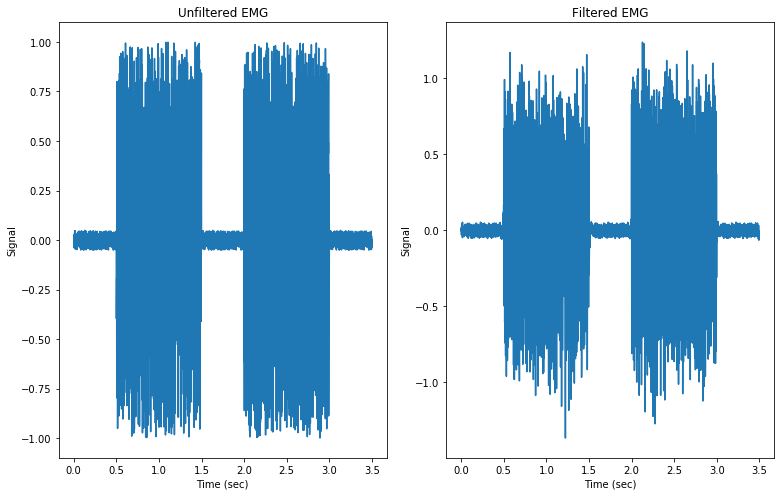

In [6]:
# create bandpass filter for EMG
high = 20/(1000/2)
low = 450/(1000/2)
b, a = sp.signal.butter(4, [high,low], btype='bandpass')

# process EMG signal: filter EMG
emg_filtered = sp.signal.filtfilt(b, a, emg_correctmean)

# plot comparison of unfiltered vs filtered mean-corrected EMG
fig, ax = plt.subplots(ncols=2, figsize=(11,7))

ax[0].set_title('Unfiltered EMG')
plot_signal(emg_correctmean, ax=ax[0])

ax[1].set_title('Filtered EMG')
plot_signal(emg_filtered, ax=ax[1])
fig.tight_layout()

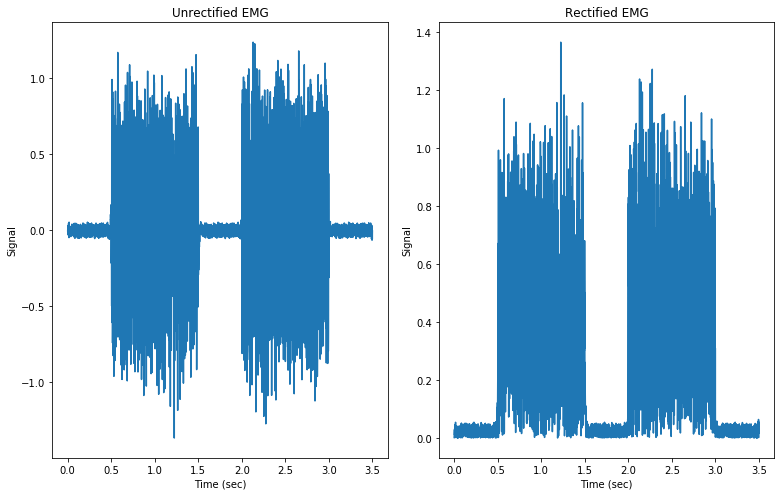

In [7]:
# process EMG signal: rectify
emg_rectified = abs(emg_filtered)

# plot comparison of unrectified vs rectified EMG
fig, ax = plt.subplots(ncols=2, figsize=(11,7))

ax[0].set_title('Unrectified EMG')
plot_signal(emg_filtered, ax=ax[0])

ax[1].set_title('Rectified EMG')
plot_signal(emg_rectified, ax=ax[1])
fig.tight_layout()


# RMS plots

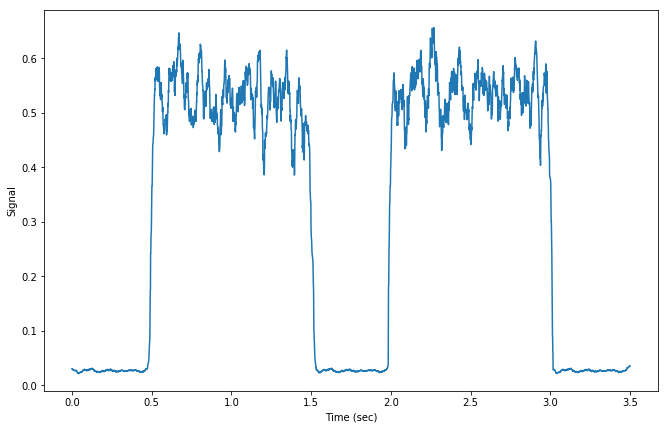

In [10]:
rms_emg = rms(emg_rectified, 35)
plot_signal(rms_emg)

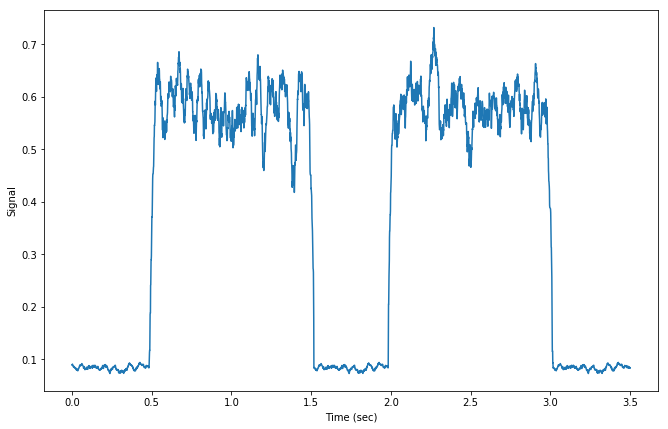

In [11]:
rms_emg = rms(emg, 35)
plot_signal(rms_emg)

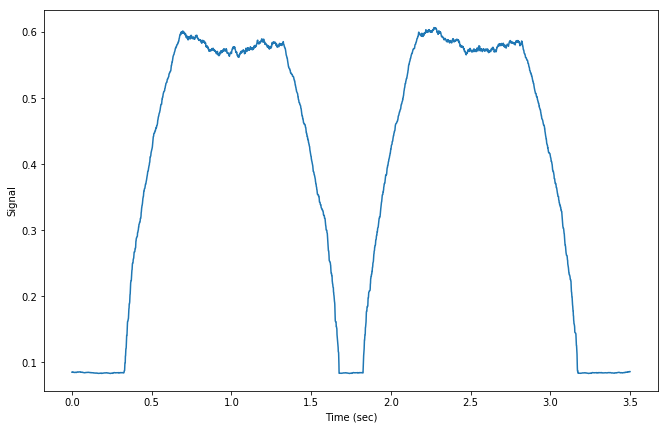

In [12]:
rms_emg = rms(emg, 350)
plot_signal(rms_emg)

# Test on sound file

In [14]:
sample_rate, sound = sp.io.wavfile.read('sample_files/cartoon-chicken.wav')

In [61]:
sample_rate

48000

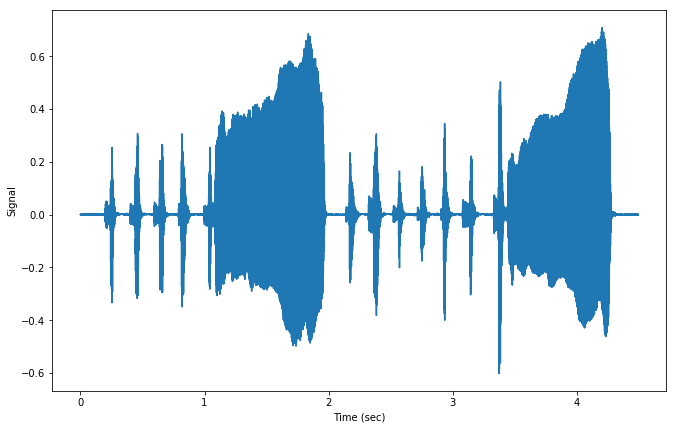

In [15]:
plot_signal(sound, sample_rate)

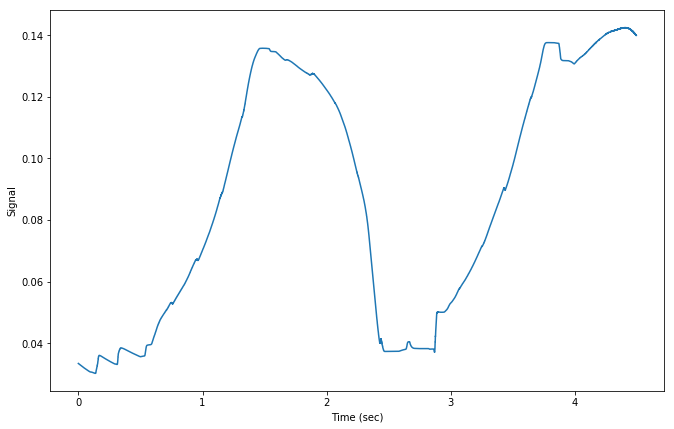

In [18]:
rms_sound = rms(sound, sample_rate)
plot_signal(rms_sound, sample_rate)
Audio(rms_sound, rate=sample_rate)

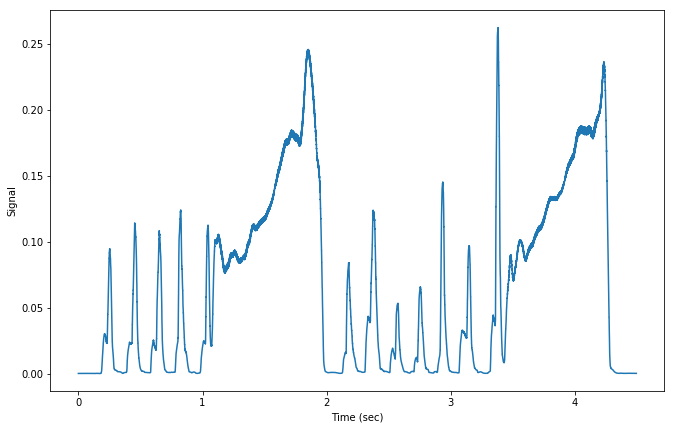

In [36]:
rms_sound = rms(sound, 1000)
plot_signal(rms_sound, sample_rate)
Audio(rms_sound, rate=sample_rate)

## What if we added noise..?

In [23]:
noise = np.random.normal(loc=0.0, scale=0.05, size=len(sound))

In [24]:
sound_with_noise = sound + noise

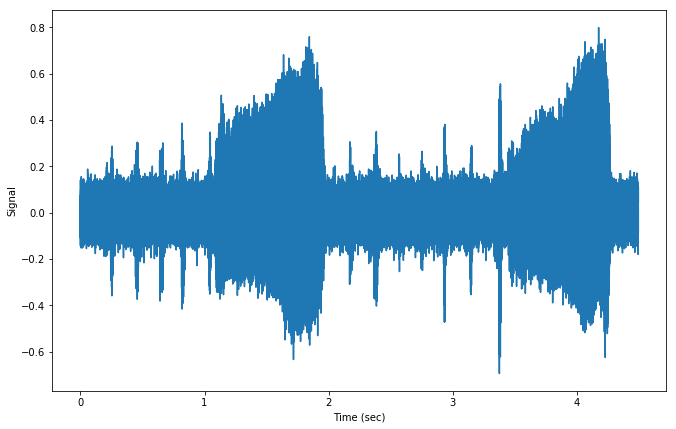

In [30]:
plot_signal(sound_with_noise, sample_rate)
Audio(sound_with_noise, rate=sample_rate)

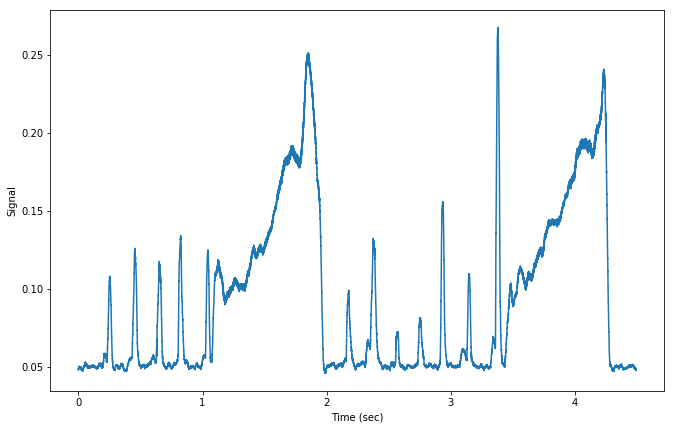

In [37]:
rms_sound_noise = rms(sound_with_noise, 1000)
plot_signal(rms_sound_noise, sample_rate)
Audio(rms_sound_noise, rate=sample_rate)

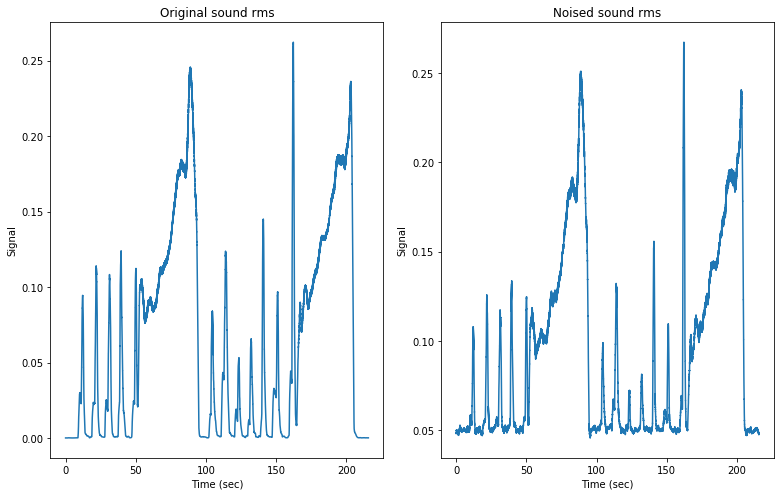

In [38]:
fig, ax = plt.subplots(ncols=2, figsize=(11,7))

ax[0].set_title('Original sound rms')
plot_signal(rms_sound, ax=ax[0])

ax[1].set_title('Noised sound rms')
plot_signal(rms_sound_noise, ax=ax[1])
fig.tight_layout()

### How does gradient look like?

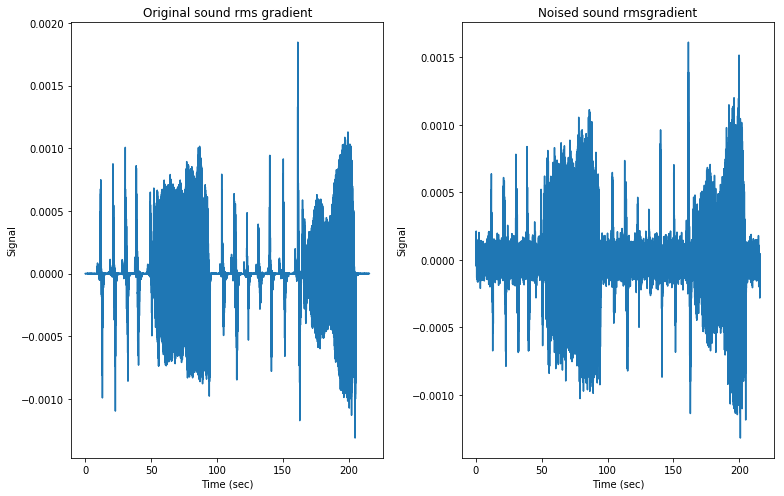

In [39]:
fig, ax = plt.subplots(ncols=2, figsize=(11,7))

ax[0].set_title('Original sound rms gradient')
plot_signal(np.gradient(rms_sound), ax=ax[0])

ax[1].set_title('Noised sound rmsgradient')
plot_signal(np.gradient(rms_sound_noise), ax=ax[1])
fig.tight_layout()

# Different recording
Requires normalising

In [41]:
rt, sound2 = sp.io.wavfile.read('sample_files/sicard-tristan.wav')
print(rt)
sound2 = sound2 / np.std(sound2)

44100


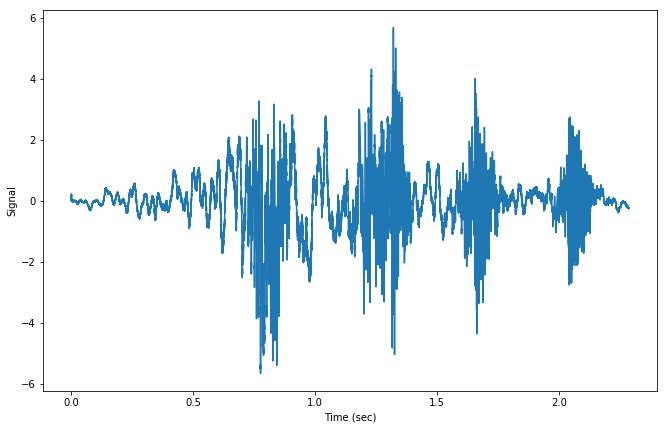

In [44]:
plot_signal(sound2, rate=rt)
Audio(sound2, rate=rt)

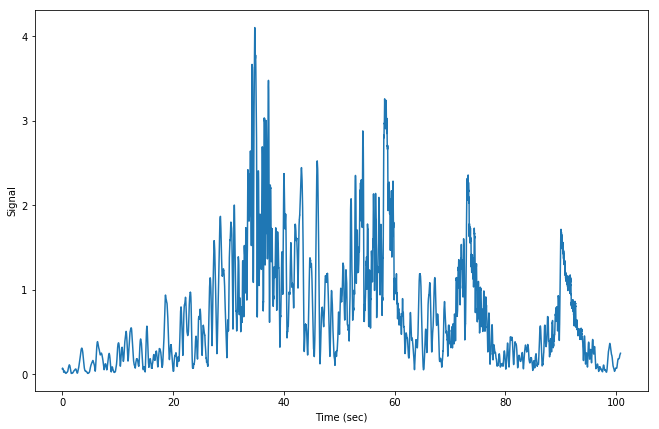

In [46]:
rms_sound2_200 = rms(sound2, 200)
plot_signal(rms_sound2_200)
Audio(rms_sound2_200, rate=rt)

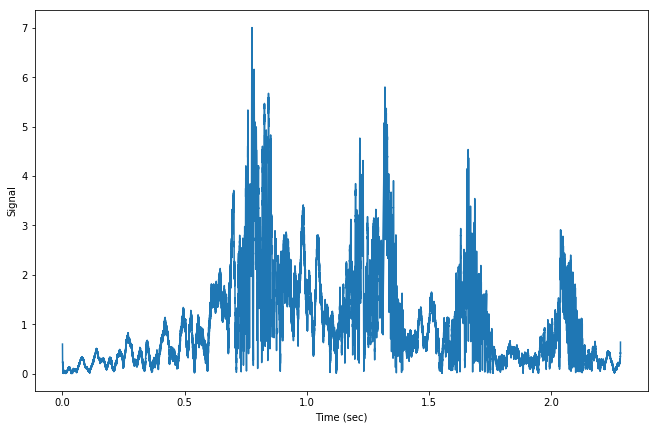

In [50]:
env = np.abs(sp.signal.hilbert(sound2))
plot_signal(env, rate=rt)
Audio(env, rate=rt)